# –°–µ—Ç–∏ —Å —Ä–∞–¥–∏–∞–ª—å–Ω—ã–º–∏ –±–∞–∑–∏—Å–Ω—ã–º–∏ —ç–ª–µ–º–µ–Ω—Ç–∞–º–∏.

–ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫.

In [1]:
import numpy as np
import pandas as pd
import math as mh
import random as rd
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import backend
from keras.models import load_model

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,10)
from mpl_toolkits.mplot3d import Axes3D

# I. RBF (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω–∞—è) —Å–µ—Ç—å –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–æ—á–µ–∫ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –∫–ª–∞—Å—Å—ã –Ω–µ —è–≤–ª—è—é—Ç—Å—è –ª–∏–Ω–µ–π–Ω–æ —Ä–∞–∑–¥–µ–ª–∏–º—ã–º–∏.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç–µ, –∑–∞–¥–∞–Ω—ã 3 –ª–∏–Ω–µ–π–Ω–æ –Ω–µ—Ä–∞–∑–¥–µ–ª–∏–º—ã—Ö –∫–ª–∞—Å—Å–∞. –¢–æ—á–∫–∏, –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—â–∏–µ –æ–¥–Ω–æ–º—É –∫–ª–∞—Å—Å—É, –ª–µ–∂–∞—Ç –Ω–∞ –∞–ª–≥–µ–±—Ä–∞–∏—á–µ—Å–∫–æ–π –ª–∏–Ω–∏–∏. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—É—á–∏—Ç—å —Å–µ—Ç—å –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–æ—á–µ–∫ –≤ –∑–∞–¥–∞–Ω–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏. –í –º–æ–µ–º –≤–∞—Ä–∏–∞–Ω—Ç–µ –≤—Å–µ —Ç—Ä–∏ –∫–ª–∞—Å—Å–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —ç–ª–ª–∏–ø—Å–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å–≤–µ–Ω–Ω–æ, —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç–ª–ª–∏–ø—Å–∞.

In [2]:
class Ellipse(object):
    def __init__(self, a, b, alpha = 0, x0 = 0, y0 = 0):
        self.a = a
        self.b = b
        self.alpha = alpha
        self.x0 = x0
        self.y0 = y0
        self.x, self.y = np.array([]), np.array([])
        self.dim = 0
        
    def f(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return x * mh.cos(self.alpha) + y * mh.sin(self.alpha) - self.x0
    
    def g(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return - x * mh.sin(self.alpha) + y * mh.cos(self.alpha) - self.y0

    def points_gen(self, start, stop, step):
        t = np.arange(start, stop, step)
        self.x = self.f(t)
        self.y = self.g(t)
        self.dim = np.size(t)

    def show(self, color='blue'):
        print("–≠–ª–ª–∏–ø—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω!")
        
        plt.plot(self.x, self.y, color=color)
        plt.title('–≠–ª–ª–∏–ø—Å')
        plt.ylabel('x')
        plt.xlabel('y')
        plt.grid()
        plt.show()

–ó–∞–¥–∞–¥–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–æ—á–µ–∫.

In [3]:
start = 0
step = 0.025
stop = 2 * mh.pi

–°–æ–∑–¥–∞–¥–∏–º —Ç—Ä–∏ —ç–ª–ª–∏–ø—Å–∞ —Å–æ–≥–ª–∞—Å–Ω–æ –≤–∞—Ä–∏–∞–Ω—Ç—É –∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–ª—è –Ω–∏—Ö —Ç–æ—á–∫–∏.

–≠–ª–ª–∏–ø—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω!


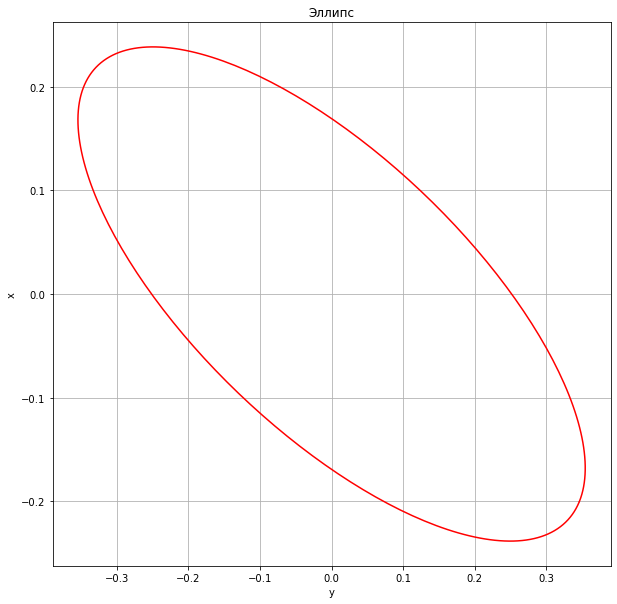

In [4]:
a, b, alpha = 0.4, 0.15, mh.pi/ 6
line1 = Ellipse(a, b, alpha)
line1.points_gen(start, stop, step)
line1.show('red')

–≠–ª–ª–∏–ø—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω!


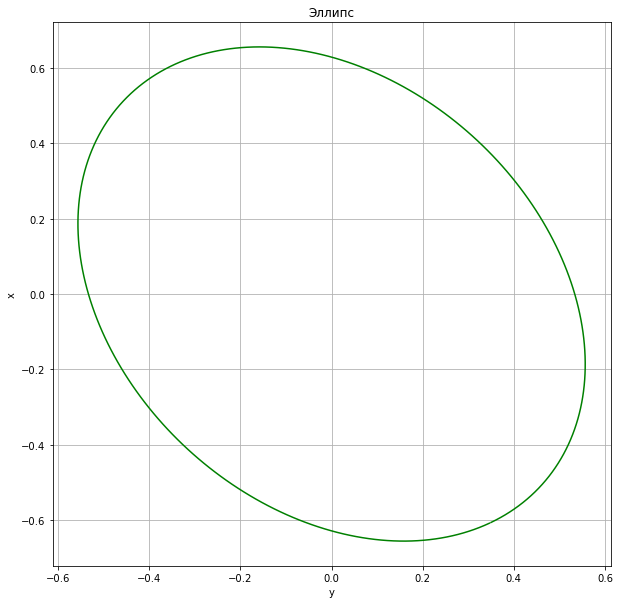

In [5]:
a, b, alpha = 0.7, 0.5, mh.pi/ 3
line2 = Ellipse(a, b, alpha)
line2.points_gen(start, stop, step)
line2.show('green')

–≠–ª–ª–∏–ø—Å –ø–æ—Å—Ç—Ä–æ–µ–Ω!


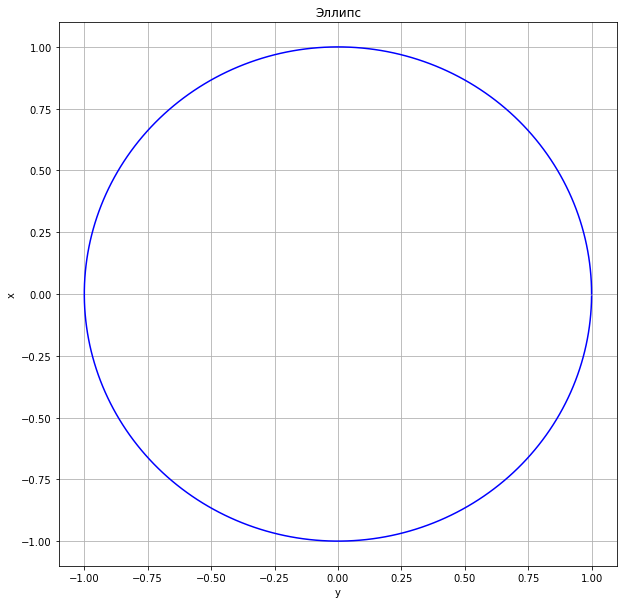

In [6]:
a, b = 1, 1
line3 = Ellipse(a, b)
line3.points_gen(start, stop, step)
line3.show('blue')

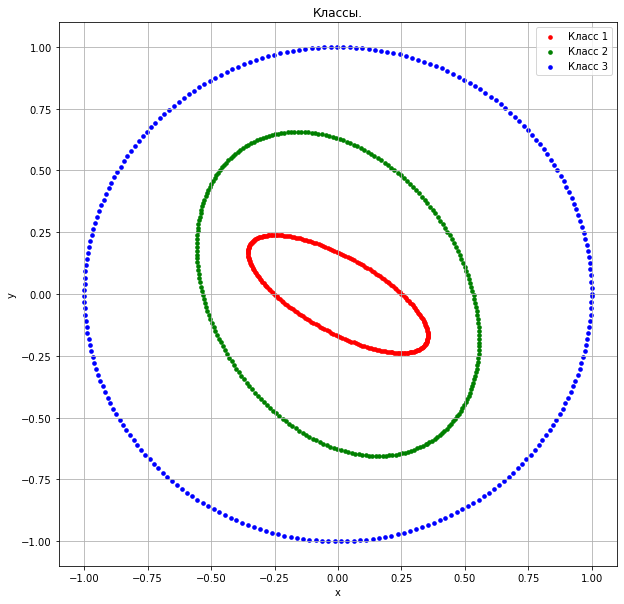

In [7]:
plt.scatter(line1.x, line1.y, color='r', linewidth=2, s=7)
plt.scatter(line2.x, line2.y, color='g', linewidth=2, s=7)
plt.scatter(line3.x, line3.y, color='b', linewidth=2, s=7)


plt.title('–ö–ª–∞—Å—Å—ã.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['–ö–ª–∞—Å—Å 1', '–ö–ª–∞—Å—Å 2', '–ö–ª–∞—Å—Å 3'], loc='upper right')
plt.grid()
plt.show()

# –†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

–î–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –≤—ã–±–µ—Ä–µ–º –∏–∑ –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ 60 —Ç–æ—á–µ–∫ —Ä–∞–Ω–¥–æ–º–Ω—ã–º –æ–±—Ä–∞–∑–æ–º,–∏–∑ –≤—Ç–æ—Ä–æ–≥–æ –∏ —Ç—Ä–µ—Ç—å–µ–≥–æ –∫–ª–∞—Å—Å–æ–≤ - 100 –∏ 120 —Ç–æ—á–µ–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

In [8]:
r = np.array([[line1.x[i], line1.y[i]] for i in np.random.permutation(line1.dim)[:100]])
g = np.array([[line2.x[i], line2.y[i]] for i in np.random.permutation(line2.dim)[:120]])
b = np.array([[line3.x[i], line3.y[i]] for i in np.random.permutation(line3.dim)[:150]])

–¢–µ–ø–µ—Ä—å —Ä–∞–∑–¥–µ–ª–∏–º –º–Ω–æ–∂–µ—Å—Ç–≤–∞ —Ç–æ—á–µ–∫ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 80 : 20. –ß—Ç–æ–±—ã –º–æ–¥–µ–ª—å –æ–±—É—á–∞–ª–∞—Å—å –Ω–∞ —Ä–∞–∑–Ω–æ—Ä–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Å–Ω–∞—á–∞–ª–∞ –ø–µ—Ä–µ–º–µ—à–∞–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ç–æ—á–∫–∏.

In [9]:
np.random.shuffle(r)
np.random.shuffle(g)
np.random.shuffle(b)

r_train, r_test = np.array_split(r, [ int( 0.8 * np.shape(r)[0])])
g_train, g_test = np.array_split(g, [ int( 0.8 * np.shape(g)[0])])
b_train, b_test = np.array_split(b, [ int( 0.8 * np.shape(b)[0])])

–û—Ç–æ–±—Ä–∞–∑–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞.

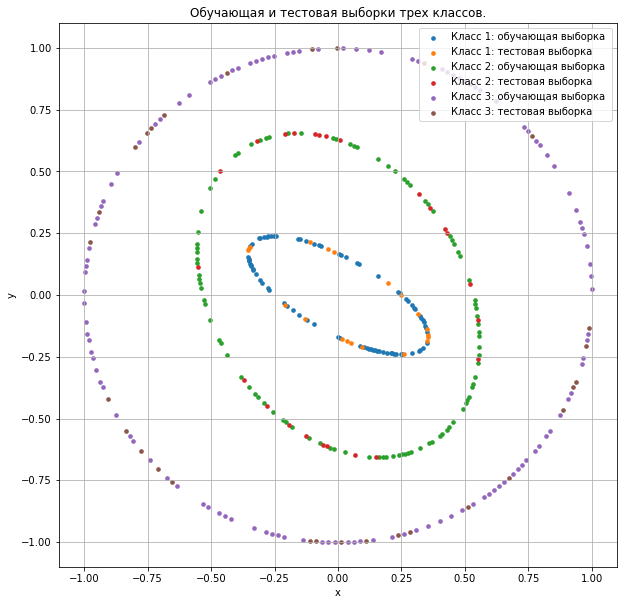

In [10]:
plt.scatter(r_train[:,0], r_train[:,1], linewidth=2, s=7)
plt.scatter(r_test[:,0], r_test[:,1], linewidth=2, s=7)

plt.scatter(g_train[:,0], g_train[:,1], linewidth=2, s=7)
plt.scatter(g_test[:,0], g_test[:,1], linewidth=2, s=7)

plt.scatter(b_train[:,0], b_train[:,1], linewidth=2, s=7)
plt.scatter(b_test[:,0], b_test[:,1], linewidth=2, s=7)

plt.title('–û–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏ —Ç—Ä–µ—Ö –∫–ª–∞—Å—Å–æ–≤.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['–ö–ª–∞—Å—Å 1: –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ ', '–ö–ª–∞—Å—Å 1: —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞',
           '–ö–ª–∞—Å—Å 2: –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ ', '–ö–ª–∞—Å—Å 2: —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞',
           '–ö–ª–∞—Å—Å 3: –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ ', '–ö–ª–∞—Å—Å 3: —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞'], loc='upper right')
plt.grid()
plt.show()

–°–æ–≥–ª–∞—Å–Ω–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é, –∫–ª–∞—Å—Å—ã –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è, —Ç.–µ. –Ω–µ—Ç —Ç–æ—á–µ–∫, –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—â–∏—Ö –æ–¥–Ω–æ–º—É –∏ —Ç–æ–º—É –∂–µ –∫–ª–∞—Å—Å—É.

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω—ã, —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞. –î–∞–ª–µ–µ, –æ–±—ä–µ–¥–∏–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤—Ö–æ–¥–Ω—ã–µ –∏ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏ –≤ —Ç—Ä–∏ –æ–±—â–∏–µ –≤—ã–±–æ—Ä–∫–∏ - —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞.

–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –≤—Ö–æ–¥–æ–≤ –∏ –≤—ã—Ö–æ–¥–æ–≤ —Å–µ—Ç–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö —Ç–æ—á–µ–∫.

In [11]:
def data_gen(r, g, b):
    #train_X, train_Y = np.empty((0,2)), np.empty((0,3))
    X, Y = [], []
    classes = np.vstack((r, g, b))
    np.random.shuffle(classes)

    for i in classes:
        j = list(i)
        
        if j in X:
            continue
        #t = np.zeros(3)
        t = [0, 0, 0]
        if i in r:
            t[0] += 1
        if i in g:
            t[1] += 1
        if i in b:
            t[2] += 1
        #train_X = np.append(train_X, [i], axis=0)
        X.append(j)
        #train_Y = np.append(train_Y, [t], axis=0)
        Y.append(t)
    return np.array(X), np.array(Y)

–§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫.

In [12]:
train_X, train_Y = data_gen(r_train, g_train, b_train)
test_X, test_Y = data_gen(r_test, g_test, b_test)

# –ö–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ —Å–µ—Ç–∏

–¢.–∫. —Å–µ—Ç—å —Å —Ä–∞–¥–∏–∞–ª—å–Ω—ã–º–∏ –±–∞–∑–∏—Å–Ω—ã–º–∏ —ç–ª–µ–º–µ–Ω—Ç–∞–º–∏ –¥–≤—É—Ö—Å–ª–æ–π–Ω–∞—è, –Ω–æ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–µ–Ω—è—é—Ç—Å—è –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ç–æ–ª—å–∫–æ –º–µ–∂–¥—É –≤—ã—Ö–æ–¥–Ω—ã–º –∏ —Å–∫—Ä—ã—Ç—ã–º —Å–ª–æ–µ–º, —Å–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–µ–º —Å–µ—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –±–∏–±–ª–∏–æ—Ç–µ–∫.

In [13]:
class RBF(object):
    def __init__(self, neurons1, neurons2, const_weights):
        self.layers = 2
        self.neurons = np.array([neurons1, neurons2])
        if neurons1 > 1:
            self.weights = np.array([const_weights.transpose(), np.array([[rd.random() for i in range(neurons1)] for j in range(neurons2)]).transpose()])
            self.beta = np.array([rd.random() for i in range(neurons2)])
        else:
            self.weights = np.array([const_weights.transpose(), np.array([rd.random() for i in range(neurons1)]).transpose()])
            self.beta = rd.random()
    def show(self):
        print("The network consists of:")
        print("\t ", self.layers, "hidden layer with ", self.neurons[0], " neuron(s), out layer with ", self.neurons[1], " neuron(s).")
        print("Hidden layer constant weights: ")
        print(self.weights[0])
        print("Out layer weights: ")
        print(self.weights[1])

–°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–µ–º —Å–µ—Ç—å.
–í–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è –±—É–¥—É—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ —Ç–æ—á–µ–∫. –î–ª—è —ç—Ç–æ–≥–æ –æ–±—ä–µ–¥–∏–Ω–∏–º –∏—Ö.

In [14]:
const_weights = np.vstack((r, g, b))
n1 = np.shape(const_weights)[0]
n2 = 3

rbf = RBF(n1, n2, const_weights)
rbf.show()

The network consists of:
	  2 hidden layer with  370  neuron(s), out layer with  3  neuron(s).
Hidden layer constant weights: 
[[-1.54360414e-01 -3.49315382e-01 -2.52021287e-01  2.93247203e-01
   3.52224000e-01  2.54107629e-01  1.12971526e-01  3.36286855e-01
   3.34524700e-01 -1.59250236e-01  8.74813037e-02 -3.33528180e-01
  -3.36421973e-01 -3.51879146e-01  1.29620845e-01  1.45946180e-01
  -2.98363462e-01 -1.26842848e-01 -2.72182467e-01  2.74081528e-01
   2.68378176e-01 -9.64522419e-02 -1.77833385e-01 -9.31680878e-02
  -1.21736628e-01 -2.81126286e-01 -1.51285161e-01  3.48271263e-01
  -3.23604018e-01  1.21334100e-01 -2.75642647e-01  3.28252829e-01
   3.19407764e-03 -3.45878512e-01 -3.41577125e-01  2.47851575e-01
   8.21873220e-02 -2.14253183e-04  3.37347982e-01  3.44546441e-01
  -3.53563396e-01  8.64579347e-03  2.43924693e-01  1.37826581e-01
  -3.10226381e-01 -3.07552718e-01  2.28170139e-01 -7.59601858e-02
  -3.43835261e-01 -2.64162101e-01 -3.47028462e-01  2.07205848e-01
  -2.14670477e-

–ì–∞—É—Å—Å–∏–∞–Ω - —Ñ—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è, –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –æ—Ç –∫–≤–∞–¥—Ä–∞—Ç–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –¥–≤—É–º—è —Ç–æ—á–∫–∞–º–∏.

In [15]:
def gaussian(x):
    return np.exp(-x)

–§—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—Ö–æ–¥–∏—Ç –∫–≤–∞–¥—Ä–∞—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –¥–≤—É–º—è —Ç–æ—á–∫–∞–º–∏.

In [16]:
def dist_count(x, weights):
    if np.shape(weights)[0] == 2:
        return np.array([ (cx - x[0])**2 + (cy - x[1])**2 for cx, cy in zip(weights[0,:], weights[1,:])])
    else:
        return np.array([ (cx - x[0])**2 for cx in weights[0,:]])

In [17]:
def predict(self, X):
    dist = np.array([gaussian(dist_count(x, self.weights[0])) for x in X])
    out = np.array([ d.dot(self.weights[1]) + self.beta for d in dist])
    return out

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞.

In [18]:
def multi_loss(out, T):
    return np.sum(np.sum((T - out)**2, axis=1)) / np.shape(T)[0]

–û–±—É—á–µ–Ω–∏–µ —Å–µ—Ç–∏.

In [19]:
def multi_train(self, D, X, Y, learning_rate, epochs):
    eps = 1e-5
    mse = 1
    mses = []
    
    for i in range(epochs):
        if mse <= eps:
            break
        for x, y, dist in zip(X, Y, D):
            #dist = dist_count(p, self.weights[0])
            out = dist.dot(self.weights[1]) + self.beta
            e = y - out
            #print(e)
            #print(np.shape(self.weights[1]))
            if e.all() == 0:
                continue
            self.weights[1] += np.array([[ i * j for j in e] for i in dist]) * learning_rate
            self.beta += e * learning_rate
        mse = multi_loss(predict(self, X), Y)
        print("Epoch: ", i + 1, " mse: ", mse)
        mses.append(mse)
        #print(mses)
    return mses

–ù–∞—Ö–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏—è —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è - –∏—â–µ–º –≥–∞—É—Å—Å–∏–∞–Ω –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –∫–∞–∂–¥—ã–º —Å–∏–≥–Ω–∞–ª–æ–º –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–∏. –ü–æ—Å–ª–µ, –æ–±—É—á–∞–µ–º —Å–µ—Ç—å.

In [20]:
dist = np.array([gaussian(dist_count(x, rbf.weights[0])) for x in train_X])

mses = multi_train(rbf, dist, train_X, train_Y, 5 * 1e-4, 1500)
print("The model is trained!")

Epoch:  1  mse:  10.800991435715918
Epoch:  2  mse:  6.951324348850337
Epoch:  3  mse:  5.262683228368114
Epoch:  4  mse:  4.083175890520804
Epoch:  5  mse:  3.208794056065307
Epoch:  6  mse:  2.5521938491159917
Epoch:  7  mse:  2.0562102726200004
Epoch:  8  mse:  1.6796648181126352
Epoch:  9  mse:  1.3923198392127567
Epoch:  10  mse:  1.1718689363439432
Epoch:  11  mse:  1.0018104949975655
Epoch:  12  mse:  0.869898129130004
Epoch:  13  mse:  0.7670090738856186
Epoch:  14  mse:  0.6863185795095359
Epoch:  15  mse:  0.6226975090777227
Epoch:  16  mse:  0.5722722380632116
Epoch:  17  mse:  0.532102443656386
Epoch:  18  mse:  0.499944560119745
Epoch:  19  mse:  0.47407756974196424
Epoch:  20  mse:  0.4531742436990135
Epoch:  21  mse:  0.43620560295253474
Epoch:  22  mse:  0.4223697293264283
Epoch:  23  mse:  0.4110384820860444
Epoch:  24  mse:  0.40171742723305465
Epoch:  25  mse:  0.39401555385805515
Epoch:  26  mse:  0.3876222698718483
Epoch:  27  mse:  0.3822898357303256
Epoch:  28  m

–ü—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è.

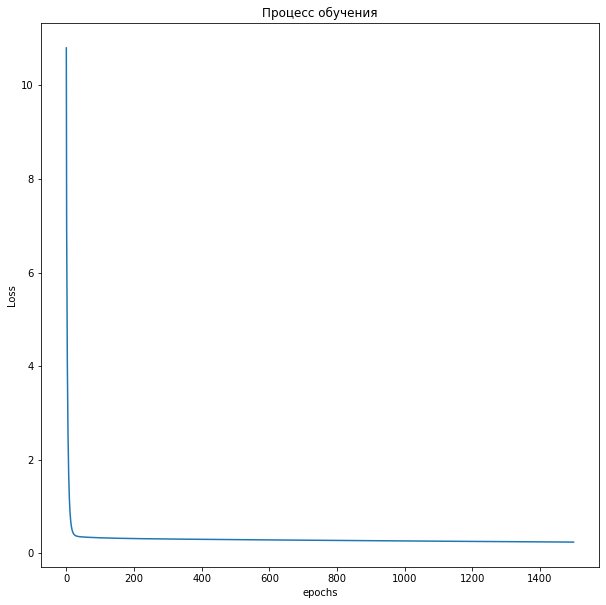

In [21]:
plt.plot(np.array(mses))
plt.title('–ü—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ —Å–µ—Ç–∏ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–ë—É–¥–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å –≤—ã—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–∞–≤–∏–ª—É.

In [22]:
def check(preds, true):
    correct = 0
    dim = np.shape(preds)[0]
    for p, t in zip(preds, true):
        if np.array_equal(p, t):
            correct += 1
    print("–°–µ—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∞ ", correct, " —Ç–æ—á–µ–∫ –∏–∑ ", dim)
    print("–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è: ", round(correct/ dim * 100, 2), " %")

In [23]:
def transform(preds):
    for i in range(np.shape(preds)[0]):
        for j in range(3):
            if preds[(i, j)] >= 0.5:
                preds[(i, j)] = 1
            else:
                preds[(i, j)] = 0
    return preds

–ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ.

In [24]:
preds = predict(rbf, train_X)
p = transform(preds)
check(p, train_Y)

–°–µ—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∞  266  —Ç–æ—á–µ–∫ –∏–∑  296
–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è:  89.86  %


–ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ.

In [25]:
preds = predict(rbf, test_X)
p = transform(preds)
check(p, test_Y)

–°–µ—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∞  68  —Ç–æ—á–µ–∫ –∏–∑  74
–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è:  91.89  %


# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–æ—á–µ–∫ —Å–µ—Ç–∫–∏

–¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –º—ã –ø—Ä–æ–≤–µ—Ä–∏–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏ –Ω–∞ –≤—Å–µ—Ö —Ç—Ä–µ—Ö –≤—ã–±–æ—Ä–∫–∞—Ö, –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ —Ç–æ—á–∫–∏ –æ–±–ª–∞—Å—Ç–∏ $[-1.2; 1.2]x[-1.2; 1.2].$

–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫ —Å–µ—Ç–∫–∏ –∑–∞–¥–∞–Ω–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏.

In [26]:
image = np.empty((0, 2))
n = np.arange(-1.1, 1.1, 0.025)
for i in n:
    for j in n:
        image = np.vstack((image, np.array([i, j])))

–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–æ—á–µ–∫ —Å–µ—Ç–∫–∏. –û–∫—Ä—É–≥–ª–∏–º –≤—ã—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–µ—Ç–∏, —Å–æ–∑–¥–∞–¥–∏–º –ø–æ –Ω–∏–º –º–∞—Ç—Ä–∏—Ü—É  ùëÄùë•ùëÅùë•3  –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –ø–æ –Ω–µ–π —Ü–≤–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É.

In [27]:
preds = predict(rbf, image)
p = np.round(preds, 1)

dimp = int(np.shape(p)[0] ** 0.5)
matrix = np.array( [ [ p[j * dimp + i] for i in range(dimp) ] for j in range(dimp) ])

–ü–æ—Å—Ç—Ä–æ–∏–º —Ü–≤–µ—Ç–æ–≤—É—é –∫–∞—Ä—Ç—É.

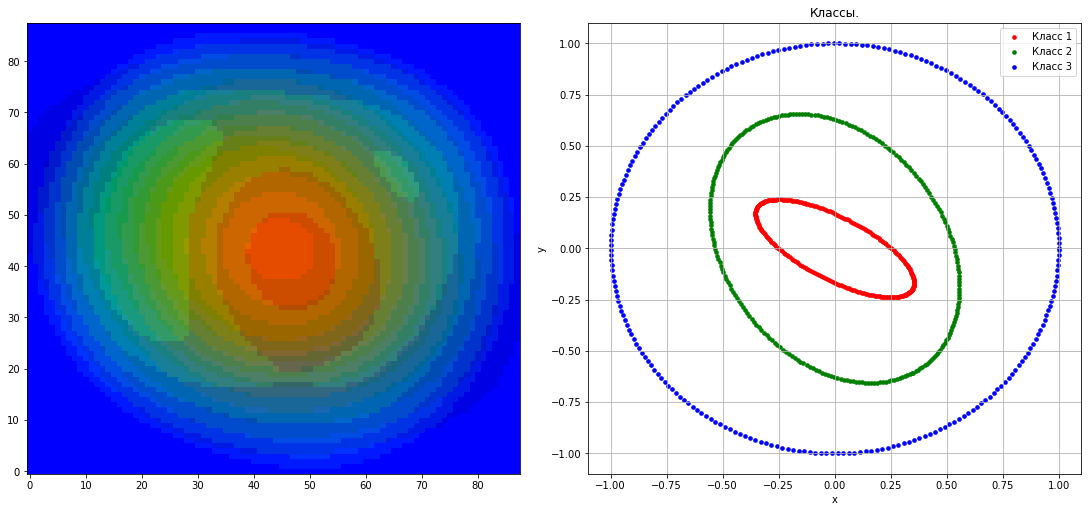

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)
p1 = axes[0].imshow(matrix, aspect='auto', origin="lower")

plt.scatter(line1.x, line1.y, color='r', linewidth=2, s=7)
plt.scatter(line2.x, line2.y, color='g', linewidth=2, s=7)
plt.scatter(line3.x, line3.y, color='b', linewidth=2, s=7)


plt.title('–ö–ª–∞—Å—Å—ã.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['–ö–ª–∞—Å—Å 1', '–ö–ª–∞—Å—Å 2', '–ö–ª–∞—Å—Å 3'], loc='upper right')
plt.grid()
plt.show()

# II. –û–±–æ–±—â–µ–Ω–Ω–æ-—Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–∞—è –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ —Ñ—É–Ω–∫—Ü–∏–∏. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–±–æ—Ç—ã —Å–µ—Ç–∏ —Å —Ä—ã—Ö–ª—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

–ë—É–¥–µ–º —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –∑–∞–¥–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–∏–º –∏ –æ–±—É—á–∏–º –¥–≤—É—Ö—Å–ª–æ–π–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –ø—Ä—è–º–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è.

–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä—É—é –±—É–¥–µ–º –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä–æ–≤–∞—Ç—å.

In [29]:
def x(t):
    return np.cos(2.5 * t**2 - 5 * t)

–°—Ñ–æ—Ä–º–∏—Ä—É–µ–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É.

In [30]:
a, b, h = 0, 2.2, 0.01
T = np.vstack(np.arange(a, b, h))
X = x(T)

–†–∞–∑–¥–µ–ª–∏–º –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–æ–∂–µ—Å—Ç–≤–æ. –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≥–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –≤–æ–∑—å–º–µ–º 10% —Å –∫–æ–Ω—Ü–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [31]:
train_T, test_T =  np.array_split(T, [ int( 0.9 * np.shape(T)[0])])
train_X, test_X =  np.array_split(X, [ int( 0.9 * np.shape(X)[0])])

train_T, test_T = np.vstack(train_T), np.vstack(test_T)
train_X, test_X = np.vstack(train_X), np.vstack(test_X)

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫–∏.

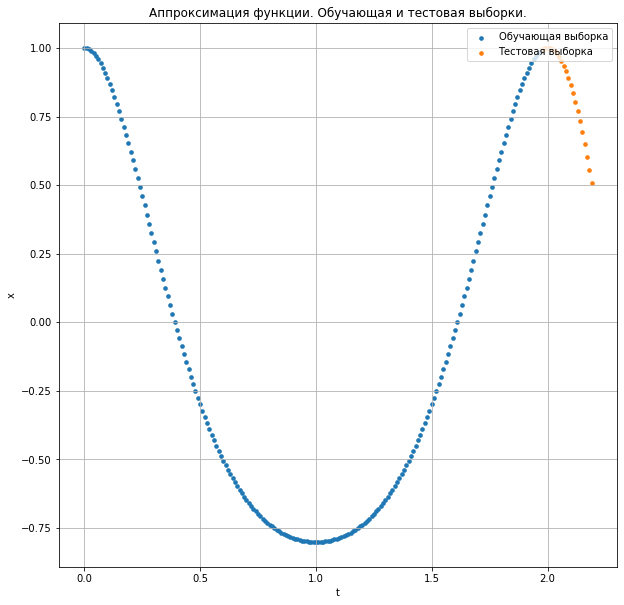

In [32]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(test_T, test_X, linewidth=2, s=7)

plt.title('–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏. –û–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏.')
plt.ylabel('x')
plt.xlabel('t')
plt.legend(['–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞', '–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞'], loc='upper right')
plt.grid()
plt.show()

# –ö–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ —Å–µ—Ç–∏

–°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–µ–º —Å–µ—Ç—å.

In [33]:
n1 = np.shape(T)[0]
n2 = 1

rbf = RBF(n1, n2, T)
rbf.show()

The network consists of:
	  2 hidden layer with  220  neuron(s), out layer with  1  neuron(s).
Hidden layer constant weights: 
[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
  0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
  0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
  0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
  0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
  0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
  0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
  0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
  1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
  1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
  1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
  1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
  1.68 1.

–û–±—É—á–∏–º —Å–µ—Ç—å.

In [34]:
dist = np.array([gaussian(dist_count(t, rbf.weights[0])) for t in train_T])

mses = multi_train(rbf, dist, train_T, train_X, 1e-2, 500)
print("The model is trained!")

Epoch:  1  mse:  1074.4901341387767
Epoch:  2  mse:  73.09007474969992
Epoch:  3  mse:  5.032386220665904
Epoch:  4  mse:  2.1590008172194946
Epoch:  5  mse:  2.147783528327875
Epoch:  6  mse:  1.8632343662886912
Epoch:  7  mse:  1.5049642992961216
Epoch:  8  mse:  1.1861590975521197
Epoch:  9  mse:  0.9274967931134269
Epoch:  10  mse:  0.7235333180930944
Epoch:  11  mse:  0.5642241935167863
Epoch:  12  mse:  0.4402397176294613
Epoch:  13  mse:  0.3439183466078986
Epoch:  14  mse:  0.2691831162831379
Epoch:  15  mse:  0.21126616807118867
Epoch:  16  mse:  0.16644044072849712
Epoch:  17  mse:  0.13179658349463108
Epoch:  18  mse:  0.10506519370397222
Epoch:  19  mse:  0.08447700355578729
Epoch:  20  mse:  0.06865337458283893
Epoch:  21  mse:  0.05652065230706509
Epoch:  22  mse:  0.047243219569409536
Epoch:  23  mse:  0.040171181433904884
Epoch:  24  mse:  0.034799492936370045
Epoch:  25  mse:  0.030736033688680345
Epoch:  26  mse:  0.027676676688658027
Epoch:  27  mse:  0.0253858240883

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è.

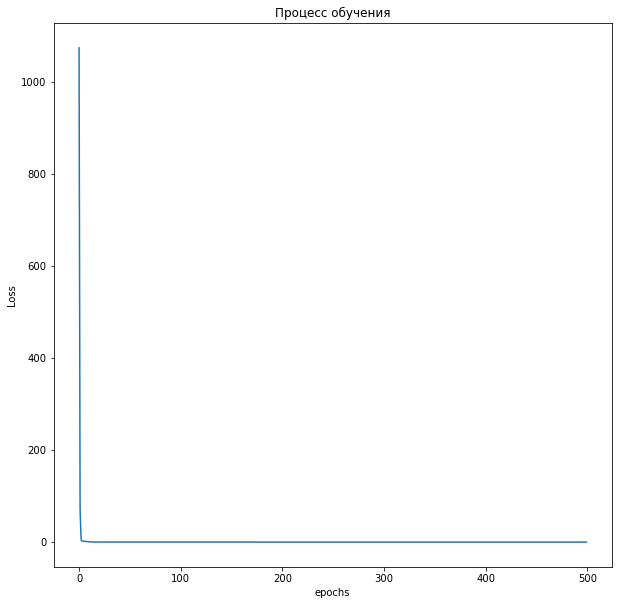

In [35]:
plt.plot(np.array(mses))
plt.title('–ü—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —Å–µ—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–µ.

In [36]:
preds = np.array([predict(rbf, train_T), predict(rbf, test_T)])
print("MSE on train data: ", multi_loss(preds[0], train_X))
print("MSE on test data: ", multi_loss(preds[1], test_X))

MSE on train data:  0.008635812891865208
MSE on test data:  0.16448612098666146


–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

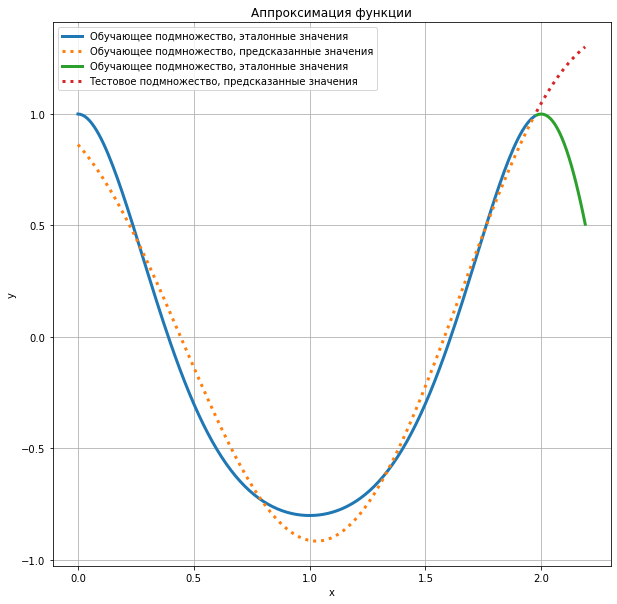

In [37]:
plt.plot(train_T, train_X, linewidth=3)
plt.plot(train_T, preds[0], linestyle=':', linewidth=3)

plt.plot(test_T, test_X, linewidth=3)
plt.plot(test_T, preds[1], linestyle=':', linewidth=3)

plt.title('–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['–û–±—É—á–∞—é—â–µ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, —ç—Ç–∞–ª–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', '–û–±—É—á–∞—é—â–µ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è',
            '–û–±—É—á–∞—é—â–µ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, —ç—Ç–∞–ª–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', '–¢–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è'])
plt.grid()
plt.show()

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ–≤–µ—Ä–Ω–æ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ —Ç–µ—Ö –¥–∞–Ω–Ω—ã—Ö, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –æ–Ω–∞ –Ω–µ –æ–±—É—á–∞–ª–∞—Å—å. –¢.–∫. –º—ã —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–ª–∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å –∫–æ–Ω—Ü–∞, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Å–µ—Ç—å –Ω–µ –æ–±—É—á–∞–ª–∞—Å—å –Ω–∞ —Ç–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è —ç—Ç–∏ —Ç–æ—á–∫–∏.

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä—ã—Ö–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–î–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä—ã—Ö–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –æ–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º. –ü–µ—Ä–µ–º–µ—à–∞–µ–º –≤—Å–µ —Ç–æ—á–∫–∏ –∏ —Ä–∞–∑–¥–µ–ª–∏–º —Ä–∞–Ω–¥–æ–º–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–Ω–æ–∂–µ—Å—Ç–≤–∞ –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 80 –∏ 20%.

In [38]:
np.random.shuffle(T)
T = T[:100]

train_T, test_T = np.array_split(T, [ int( 0.8 * np.shape(T)[0])])
train_X, test_X = x(train_T), x(test_T)

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä—ã—Ö–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

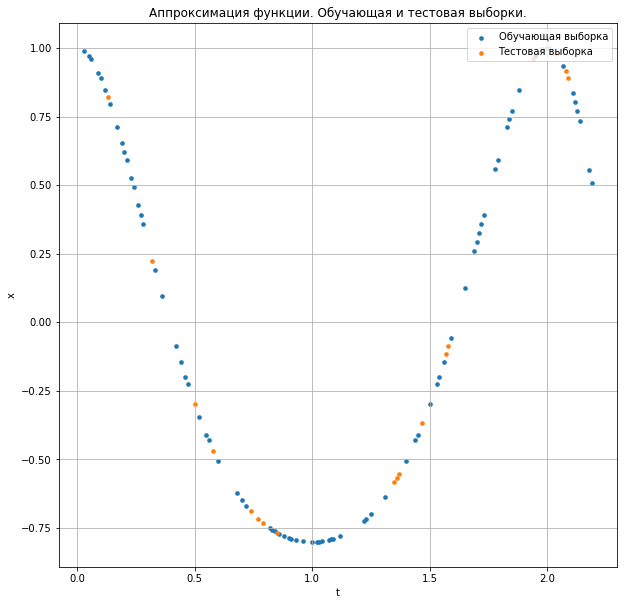

In [39]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(test_T, test_X, linewidth=2, s=7)

plt.title('–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏. –û–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏.')
plt.ylabel('x')
plt.xlabel('t')
plt.legend(['–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞', '–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞'], loc='upper right')
plt.grid()
plt.show()

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ —Ä—ã—Ö–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [40]:
n1 = np.shape(T)[0]
n2 = 1
rbf2 = RBF(n1, n2, T)

In [41]:
dist = np.array([gaussian(dist_count(t, rbf2.weights[0])) for t in train_T])
mses = multi_train(rbf2, dist, train_T, train_X, 1e-2, 500)
print("The model is trained!")

Epoch:  1  mse:  0.07209108654904604
Epoch:  2  mse:  0.06814341546890831
Epoch:  3  mse:  0.06510330947980292
Epoch:  4  mse:  0.06246970026626077
Epoch:  5  mse:  0.06007405941731629
Epoch:  6  mse:  0.05784524604743106
Epoch:  7  mse:  0.05574916289512819
Epoch:  8  mse:  0.05376719906678005
Epoch:  9  mse:  0.05188782032006354
Epoch:  10  mse:  0.05010298556763224
Epoch:  11  mse:  0.04840649946303353
Epoch:  12  mse:  0.0467932100687008
Epoch:  13  mse:  0.04525860149335874
Epoch:  14  mse:  0.04379858033677947
Epoch:  15  mse:  0.04240936032078678
Epoch:  16  mse:  0.04108739769711666
Epoch:  17  mse:  0.03982935329402818
Epoch:  18  mse:  0.03863206871345608
Epoch:  19  mse:  0.03749255015476791
Epoch:  20  mse:  0.03640795643523144
Epoch:  21  mse:  0.035375589394701104
Epoch:  22  mse:  0.034392885721331715
Epoch:  23  mse:  0.03345740968237536
Epoch:  24  mse:  0.03256684648014324
Epoch:  25  mse:  0.03171899607805312
Epoch:  26  mse:  0.03091176740790589
Epoch:  27  mse:  0.

In [42]:
preds = np.array([predict(rbf2, train_T), predict(rbf2, test_T)])
print("MSE on train data: ", multi_loss(preds[0], train_X))
print("MSE on test data: ", multi_loss(preds[1], test_X))

MSE on train data:  0.013998150104026585
MSE on test data:  0.023168867430934804


–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

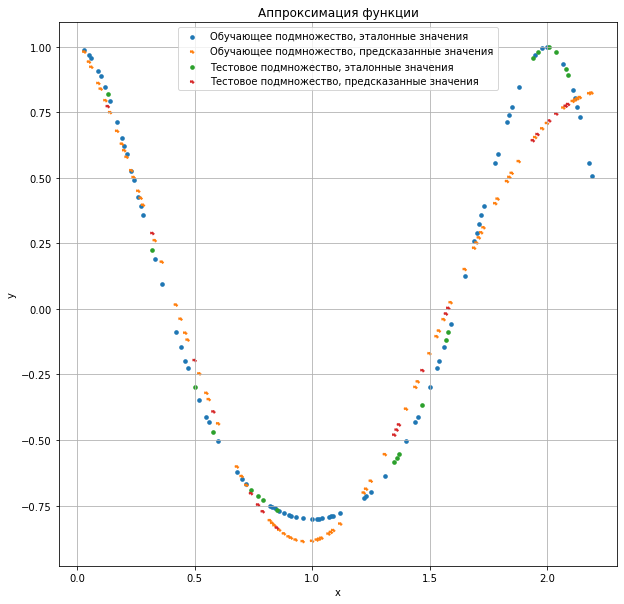

In [43]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(train_T, preds[0], linestyle=':', linewidth=2, s=7)

plt.scatter(test_T, test_X, linewidth=2, s=7)
plt.scatter(test_T, preds[1], linestyle=':', linewidth=2, s=7)

plt.title('–ê–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['–û–±—É—á–∞—é—â–µ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, —ç—Ç–∞–ª–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', '–û–±—É—á–∞—é—â–µ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è',
            '–¢–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, —ç—Ç–∞–ª–æ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', '–¢–µ—Å—Ç–æ–≤–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è'])
plt.grid()
plt.show()

–ù–∞ —Ä—ã—Ö–ª—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–µ—Ç—å –Ω–µ–ø–ª–æ—Ö–æ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é.